### Lesson 04 - Custom Data Loading

#### Structured Data

In [16]:
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd

In [17]:
# loading the iris data
df = pd.read_csv("iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [18]:
df["species"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [19]:
{val: ind for ind, val in enumerate(df["species"].unique())}

{'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

In [20]:
class Iris(Dataset):
    def __init__(self, target_col_name="species"):
        self.df = pd.read_csv("iris.csv")
        x = self.df.drop(target_col_name, axis=1).to_numpy()
        self.x = torch.from_numpy(x)
        
        replacement_dict = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
        y = self.df[target_col_name].replace(replacement_dict).to_numpy()
        self.y = torch.from_numpy(y)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.df.shape[0]

In [21]:
df.shape

(150, 5)

In [22]:
iris_data = Iris()
len(iris_data)

150

In [23]:
iris_data_loader = DataLoader(iris_data, batch_size=8)

In [24]:
for data in iris_data_loader:
    x, y = data
    print(f"independent col data: {x}, \ntarget_col: {y}")
    break

independent col data: tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000]], dtype=torch.float64), 
target_col: tensor([0, 0, 0, 0, 0, 0, 0, 0])


In [25]:
iris_data_loader = DataLoader(iris_data, batch_size=8, shuffle=True)

In [26]:
for data in iris_data_loader:
    x, y = data
    print(f"independent col data: {x}, \ntarget_col: {y}")
    break

independent col data: tensor([[6.1000, 2.8000, 4.0000, 1.3000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.9000, 3.0000, 4.2000, 1.5000],
        [5.1000, 3.5000, 1.4000, 0.3000]], dtype=torch.float64), 
target_col: tensor([1, 2, 0, 1, 1, 0, 1, 0])


#### Unstructured Data

In [31]:
import torch 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt 
import numpy as np
import os

In [32]:
ROOT = os.path.join("data", "img_data")
train_path = os.path.join(ROOT, "train")
val_path = os.path.join(ROOT, "validation")

In [33]:
Height, Width, Channel = (224, 224, 3)

IMG_SIZE = (Height, Width)

train_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor()
])

val_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor()
])

In [34]:
train_data = datasets.ImageFolder(root=train_path, transform=train_transform)
train_data_loader = DataLoader(train_data, batch_size=8, shuffle=True)

In [35]:
data = next(iter(train_data_loader))

In [36]:
len(data)

2

In [37]:
data[0].shape

torch.Size([8, 3, 224, 224])

In [38]:
data[1].shape

torch.Size([8])

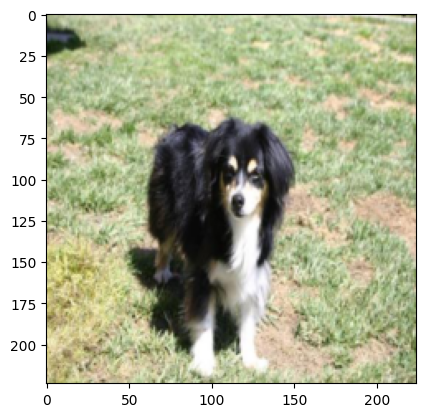

In [39]:
plt.imshow(transforms.ToPILImage()(data[0][0]))
plt.show()